<a href="https://colab.research.google.com/github/pgbio99/Machine-Learning-and-Bioinformatics-Framework-for-Breast-Cancer-Subtype-Classification-and-Biomarker/blob/main/robust_biomarker_rf_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload files from drive to google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
normalized_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/basal_norm_transposed.csv', index_col=0)
normalized2_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GSE57297_basal_properly_transposed.csv', index_col=0)
labels_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subtype_sample id_label.csv')
significant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GEO_both ids_sign_DEGs_subtypes.csv')

In [3]:
#normalized_df.head()
normalized2_df.head()
#significant_df.head()
#labels_df.head()

,HEBP1,KCNE4,BPIFA3,LOC100129869,IRG1,SNAR-G2,LOC100506844,CKLF,MGST2,CLK1,...,XLOC_008895,ROBO1,CHRNA4,HYDIN2,OR2J3,XLOC_009404,SIK1,HMGXB4,WDR63,XLOC_007557
GSM1378981,10.566261,7.736310,3.709674,4.664900,4.561795,12.654282,7.834377,5.209299,9.995162,6.637280,...,4.724695,5.170354,4.403739,4.786722,3.803926,3.547284,8.325681,8.854151,3.894693,3.804742
GSM1378998,11.440562,6.631869,4.186634,4.685010,4.601741,10.719882,7.567227,4.204756,10.073148,8.365583,...,4.175372,5.974421,4.950545,4.469342,4.982502,4.636595,7.793706,8.653830,5.856910,4.842274
GSM1379008,10.874440,7.526332,3.810002,5.028661,4.296805,11.915633,8.553195,6.187959,10.271136,7.983288,...,4.924382,5.738772,4.201300,4.543334,3.687899,4.577200,9.106410,8.294286,4.079478,4.156181
GSM1379006,12.316688,11.531485,3.010592,4.371006,4.606967,12.113443,7.873559,4.798010,10.829527,7.811109,...,4.570609,4.438758,4.697671,4.871020,4.751543,3.914534,8.205065,8.868963,4.992293,4.789775
GSM1378987,11.914929,9.158481,2.937357,4.404370,4.594040,7.996126,8.619112,4.737636,10.748328,6.947373,...,4.943801,5.699687,4.809107,4.856458,3.928971,3.916491,7.328303,8.992637,4.334701,4.282078


In [4]:
sig_genes = significant_df['GeneSymbol'].unique()
# Filter sig_genes to only include those present in normalized_df columns
common_genes1 = [gene for gene in sig_genes if gene in normalized_df.columns]
common_genes2 = [gene for gene in sig_genes if gene in normalized2_df.columns]

Filtering data

In [5]:
filtered_df1 = normalized_df[common_genes1]
filtered_df2 = normalized2_df[common_genes2]

filtered_df1.to_csv('filtered_normalized1.csv')
filtered_df2.to_csv('filtered_normalized2.csv')

In [6]:
#filtered_df1.head()
filtered_df2.head()

,FOXA1,SERPINB5,NEU1,SPDEF,FERMT1,FANCB,RHOB,HORMAD1,KCNN4,UGT8,...,XLOC_l2_015800,XLOC_l2_015821,LOC388796,VGLL3,XLOC_l2_006862,PDGFRA,OXR1,MFI2,XLOC_005748,SYT8
GSM1378981,4.220412,11.417005,11.688603,7.849757,4.793388,5.472191,10.333810,8.255264,13.038087,7.507829,...,5.861985,5.701947,5.973012,7.681602,10.531806,12.102486,6.181824,7.896350,5.511738,10.615888
GSM1378998,9.103023,7.741739,11.161492,9.389587,5.095051,5.856385,10.389212,4.962849,13.098053,8.452941,...,10.833727,8.659823,5.660905,7.735036,9.869272,10.294148,4.779327,7.459181,5.940120,6.580437
GSM1379008,4.048135,10.215828,11.426160,5.180874,6.043415,6.102550,9.848893,7.682544,10.810069,7.962172,...,6.860849,7.245946,5.480566,7.586947,9.170365,10.314521,3.661747,5.681053,6.864531,8.056655
GSM1379006,12.879896,7.821743,11.993632,11.384868,4.155272,5.314250,11.908049,4.481667,9.322033,5.086928,...,4.258186,4.279216,5.721488,6.917755,8.357672,8.358989,3.952404,5.301133,4.917912,6.811043
GSM1378987,12.610278,7.595605,11.994497,12.417463,4.084476,5.242014,12.068573,5.145819,9.333963,5.162140,...,2.954801,5.165210,4.711636,7.116448,8.357150,8.865663,3.222096,5.159494,4.856800,6.175469


In [7]:
df1 = pd.read_csv('filtered_normalized1.csv')
df2 = pd.read_csv('filtered_normalized2.csv')

Combining filtered data

In [8]:
combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df = combined_df.drop_duplicates(subset=['Unnamed: 0'])
combined_df = combined_df.T.drop_duplicates().T

combined_df = combined_df.set_index('Unnamed: 0')

combined_df.to_csv("combined_file.csv")

In [9]:
data = combined_df.join(labels_df.set_index('Sample id'))

In [10]:
#print(data.head())
print(data.tail())

                FOXA1  SERPINB5       NEU1      SPDEF    FERMT1 ROPN1B  \
Unnamed: 0                                                               
GSM1379004  12.145445  5.259875  12.271982  11.793721  4.241823    NaN   
GSM1379003  13.005589  6.916788  11.208464  11.096064  4.091102    NaN   
GSM1379007  12.840312  4.586573   11.53805  13.044894  4.723267    NaN   
GSM1379009  12.818191  6.450525  11.396615  11.794968  4.207409    NaN   
GSM1379010  12.512915  7.526833  11.400392   11.42616  4.543829    NaN   

               FANCB       RHOB   HORMAD1     KCNN4  ...   KIAA1244   CCDC160  \
Unnamed: 0                                           ...                        
GSM1379004  5.957471  12.169816  5.430455  8.326022  ...   8.487376  6.146441   
GSM1379003  4.884436  11.620187  5.235636  8.131398  ...  10.017123  5.981837   
GSM1379007  4.705535  10.594514  4.792122    8.8646  ...   9.717217  6.769654   
GSM1379009  5.493065  11.854438  4.726473  9.635611  ...   9.104881  8.55641

Train-test split

In [11]:
common_genes = common_genes1 + common_genes2

In [12]:
from sklearn.model_selection import train_test_split

X = data[common_genes]
y = data['Subtype']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

Performing gridsearch for RF and KNN

In [13]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

knn_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

#Define the parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

#Use StratifiedKFold for robust validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best RF Params: {rf_grid.best_params_}")

knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print(f"Best KNN Params: {knn_grid.best_params_}")

Best RF Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best KNN Params: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}


Calculate AUC-ROC curve

In [14]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import pandas as pd

N_RUNS = 20 #Standard for stability testing

results = []
target_labels = sorted(y.unique())

for i in range(N_RUNS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i)
    best_rf.set_params(random_state=i).fit(X_train, y_train)
    best_knn.fit(X_train, y_train)

    rf_preds = best_rf.predict(X_test)
    knn_preds = best_knn.predict(X_test)

    rf_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test), multi_class='ovr', labels=target_labels)
    knn_auc = roc_auc_score(y_test, best_knn.predict_proba(X_test), multi_class='ovr', labels=target_labels)

    results.append({'Model': 'RF', 'Run': i, 'Accuracy': accuracy_score(y_test, rf_preds), 'F1_W': f1_score(y_test, rf_preds, average='weighted'), 'AUC_OVR': rf_auc})
    results.append({'Model': 'KNN', 'Run': i, 'Accuracy': accuracy_score(y_test, knn_preds), 'F1_W': f1_score(y_test, knn_preds, average='weighted'), 'AUC_OVR': knn_auc})

results_df = pd.DataFrame(results)

#Reporting the mean and standard deviation
print("\n--- Model Stability Report (Mean ± Std Dev) ---")
print(results_df.groupby('Model').agg(['mean', 'std']).round(3))


--- Model Stability Report (Mean ± Std Dev) ---
       Run        Accuracy          F1_W        AUC_OVR       
      mean    std     mean    std   mean    std    mean    std
Model                                                         
KNN    9.5  5.916    0.877  0.084  0.867  0.088   0.916  0.069
RF     9.5  5.916    0.788  0.114  0.773  0.124   0.910  0.079


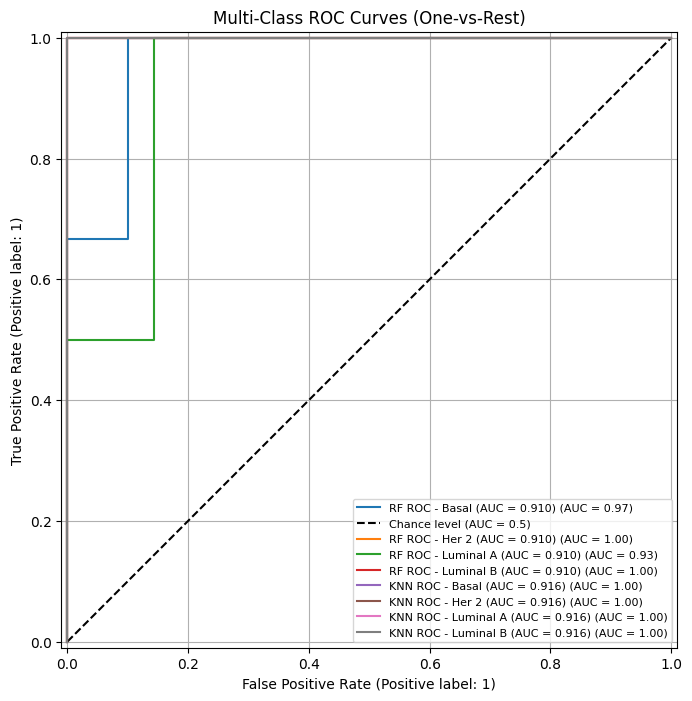

In [15]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
target_labels = lb.classes_

fig, ax = plt.subplots(figsize=(10, 8))

#Plotting RF
y_score_rf = best_rf.predict_proba(X_test)
for i in range(len(target_labels)):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_rf[:, i],
                                     name=f"RF ROC - {target_labels[i]} (AUC = {results_df[results_df['Model'] == 'RF']['AUC_OVR'].mean():.3f})",
                                     ax=ax, plot_chance_level=(i==0))

#Plotting KNN
y_score_knn = best_knn.predict_proba(X_test)
for i in range(len(target_labels)):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_knn[:, i],
                                     name=f"KNN ROC - {target_labels[i]} (AUC = {results_df[results_df['Model'] == 'KNN']['AUC_OVR'].mean():.3f})",
                                     ax=ax)

plt.title('Multi-Class ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right', prop={'size': 8})
plt.grid(True)
plt.savefig('MultiClass_ROC_Curve.png', dpi=300)
plt.show()

Calculate confusion-matrix, classification report & feature importances for RF and KNN

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rf = best_rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.9230769230769231
[[2 0 1 0]
 [0 2 0 0]
 [0 0 6 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

       Basal       1.00      0.67      0.80         3
       Her 2       1.00      1.00      1.00         2
   Luminal A       0.86      1.00      0.92         6
   Luminal B       1.00      1.00      1.00         2

    accuracy                           0.92        13
   macro avg       0.96      0.92      0.93        13
weighted avg       0.93      0.92      0.92        13



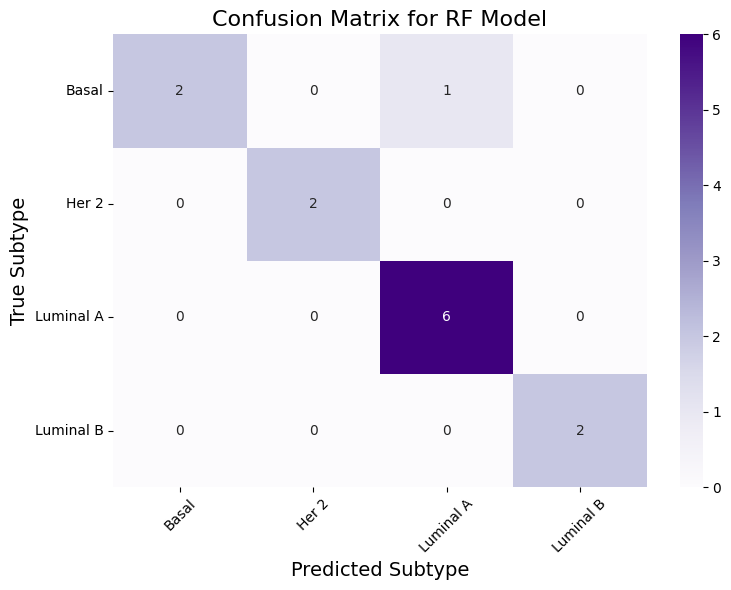

In [17]:
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred_rf)
class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=True
)

plt.title('Confusion Matrix for RF Model', fontsize=16)
plt.ylabel('True Subtype', fontsize=14)
plt.xlabel('Predicted Subtype', fontsize=14)

plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('RF_Confusion_Matrix_Heatmap.png', dpi=300)
plt.show()

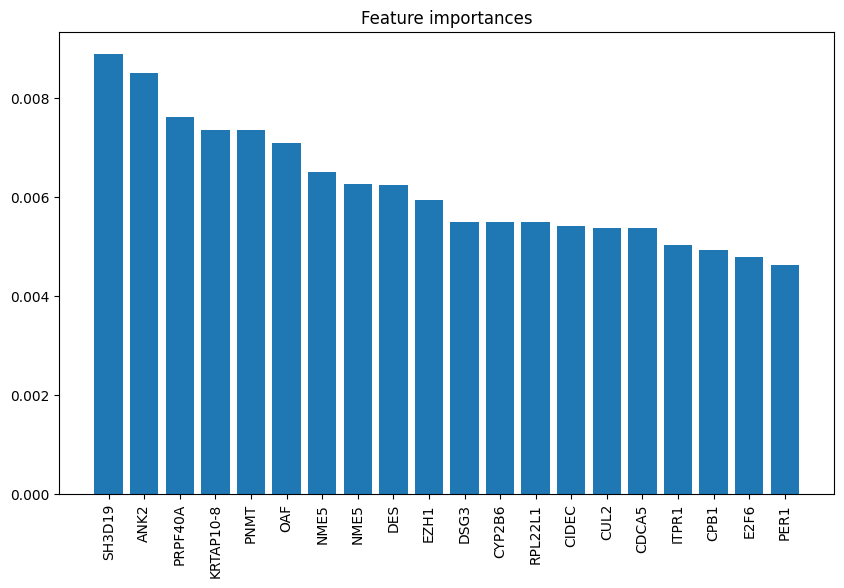

In [18]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(20), importances[indices][:20])
plt.xticks(range(20), [common_genes[i] for i in indices[:20]], rotation=90)
plt.show()

In [19]:
y_pred_knn = best_knn.predict(X_test)

print("---KNN Evaluation Metrics (Corrected)---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test,y_pred_knn))

---KNN Evaluation Metrics (Corrected)---
Accuracy: 1.0
Confusion Matrix:
 [[3 0 0 0]
 [0 2 0 0]
 [0 0 6 0]
 [0 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

       Basal       1.00      1.00      1.00         3
       Her 2       1.00      1.00      1.00         2
   Luminal A       1.00      1.00      1.00         6
   Luminal B       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [20]:
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns)

#This list is used to tell permutation_importance what to analyze
TOP_N_FOR_PERMUTATION = 100
top_n_rf_features = rf_importances.nlargest(TOP_N_FOR_PERMUTATION).index.tolist()

print(f"Defined top_n_rf_features list containing {len(top_n_rf_features)} genes.")

Defined top_n_rf_features list containing 100 genes.


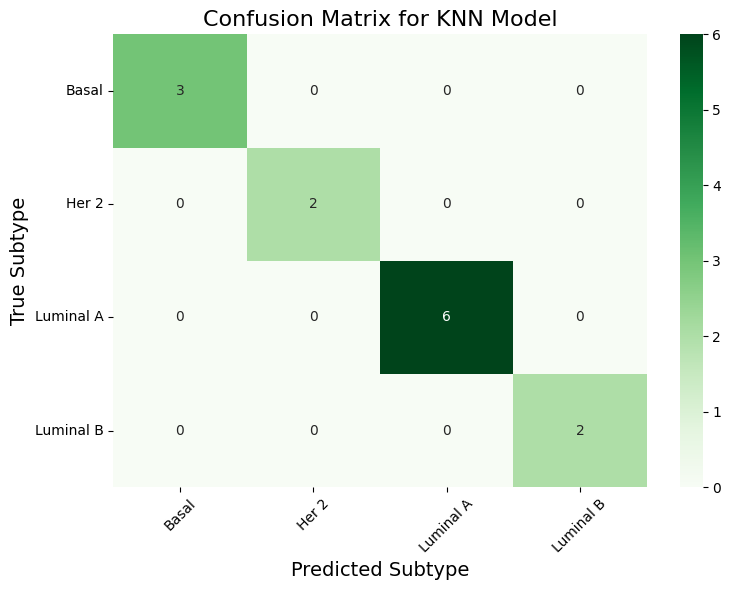

In [21]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)
class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=True
)

plt.title('Confusion Matrix for KNN Model', fontsize=16)
plt.ylabel('True Subtype', fontsize=14)
plt.xlabel('Predicted Subtype', fontsize=14)

plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('KNN_Confusion_Matrix_Heatmap.png', dpi=300)
plt.show()

In [22]:
from sklearn.inspection import permutation_importance

X_train_fast = X_train[top_n_rf_features]
X_test_fast = X_test[top_n_rf_features]

fast_knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    # We use n_neighbors=best_knn's optimized value here
    ('knn', KNeighborsClassifier(n_neighbors=best_knn.named_steps['knn'].n_neighbors))
])

fast_knn_pipeline.fit(X_train_fast, y_train)

print(f"Trained fast_knn_pipeline on only {len(top_n_rf_features)} features.")

result = permutation_importance(
    fast_knn_pipeline,
    X_test_fast,
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

Trained fast_knn_pipeline on only 100 features.


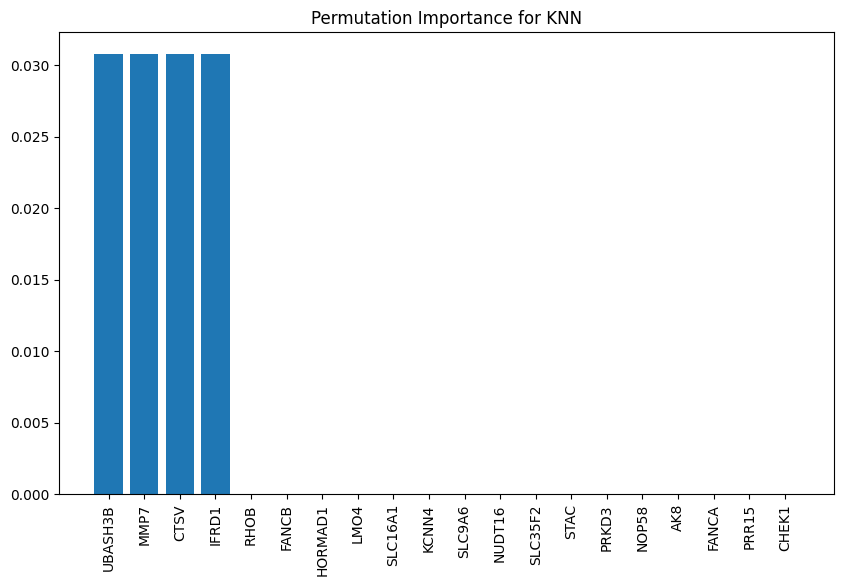

In [23]:
sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Permutation Importance for KNN")
plt.bar(range(20), result.importances_mean[sorted_idx][:20])
plt.xticks(range(20), [common_genes[i] for i in sorted_idx[:20]], rotation=90)
plt.show()

In [24]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import numpy as np

Calculate length of genes

In [41]:
print(f"Length of Gene Names: {len(genes_for_comparison)}")
print(f"Length of KNN Importances: {len(result.importances_mean)}")
print(f"Length of FILTERED RF Importances: {len(rf_importances_filtered)}")

Length of Gene Names: 197
Length of KNN Importances: 197
Length of FILTERED RF Importances: 391


In [34]:
rf_importances_full = pd.Series(best_rf.feature_importances_, index=X.columns)

knn_perm_importances_series = pd.Series(result.importances_mean, index=X_test_fast.columns)

In [36]:
importance_comparison = pd.DataFrame({
    'RF_Importance': rf_importances_full,
})
importance_comparison = importance_comparison.join(knn_perm_importances_series.rename('KNN_Permutation_Importance'), how='right')
importance_comparison = importance_comparison.reset_index(names=['Gene']).dropna()

In [37]:
print(f"Final Comparison DataFrame size: {len(importance_comparison)} genes.")

Final Comparison DataFrame size: 391 genes.


Robust biomarker identification

In [38]:
importance_comparison = importance_comparison.sort_values(by='RF_Importance', ascending=False).reset_index(drop=True)

print("\n--- Top 20 Genes (from the 100-gene Subset) Ranked by RF Importance ---")
print(importance_comparison.head(20))


--- Top 20 Genes (from the 100-gene Subset) Ranked by RF Importance ---
         Gene  RF_Importance  KNN_Permutation_Importance
0      SH3D19       0.008886               -1.538462e-02
1      SH3D19       0.008886               -1.538462e-02
2        ANK2       0.008511               -4.615385e-02
3        ANK2       0.008511               -4.615385e-02
4     PRPF40A       0.007609                0.000000e+00
5     PRPF40A       0.007609                0.000000e+00
6   KRTAP10-8       0.007353                4.440892e-17
7   KRTAP10-8       0.007353                4.440892e-17
8        PNMT       0.007346                2.220446e-17
9        PNMT       0.007346                2.220446e-17
10        OAF       0.007081                0.000000e+00
11        OAF       0.007081                0.000000e+00
12       NME5       0.006496               -9.230769e-02
13       NME5       0.006496               -9.230769e-02
14       NME5       0.006496               -9.230769e-02
15       NME5  

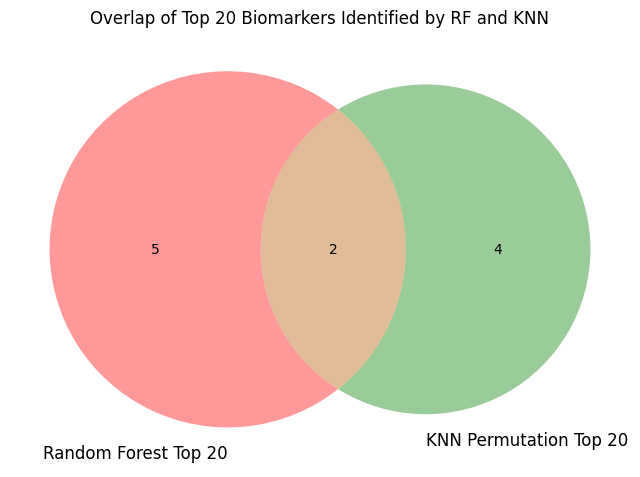

In [39]:
rf_top = set(importance_comparison.sort_values('RF_Importance', ascending=False).head(20)['Gene'])
knn_top = set(importance_comparison.sort_values('KNN_Permutation_Importance', ascending=False).head(20)['Gene'])

plt.figure(figsize=(8, 8))
venn2([rf_top, knn_top], set_labels=('Random Forest Top 20', 'KNN Permutation Top 20'))
plt.title("Overlap of Top 20 Biomarkers Identified by RF and KNN")
plt.show()

In [40]:
robust_biomarkers = rf_top.intersection(knn_top)
print("\n--- Final Robust Biomarkers (Intersection of Top 20 from both models) ---")
print(robust_biomarkers)


--- Final Robust Biomarkers (Intersection of Top 20 from both models) ---
{'PNMT', 'KRTAP10-8'}
